# Support Vector Machines

In simpliest terms, Support Vector Machines attempt to draw a "best" boundary that separates data. In a 2d case, this boundary is a line. In 3d, this boundary is a plane. There may be multiple boundaries that completely separate groups of data though! To decide which is "best", we create a margin that extends out from the boundary to the nearest data points (referred to as vector supports). The "best" boundary is the one with the largest margin. 

Check the description at https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb for a visual discussion on what it means to "maximize the margin" that best separates our data. 

In [ ]:
# import the functions needed from sklearn
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the wine dataset
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2)

# Create an SVM classifier
clf_svm = SVC(kernel='linear')
clf_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [7]:
# Make predictions
predictions = clf_svm.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("SVM Accuracy:", f'{int(round(accuracy, 2)*100)}%')

SVM Accuracy: 100%


Wow, 100% accuracy!

Unfortunately, it is difficult to visually see and/or understand the relationship between features in SVM models. For the wine dataset, there are 13 features and so our SVM created a 13d space and found the best 13d hyperplane to split the data into 3 groups. Let's try to just use 2 features so we can visualize what is happening. 

Code modified from StackOverflow: https://stackoverflow.com/questions/51495819/how-to-plot-svm-decision-boundary-in-sklearn-python

C:\Users\dcham\AppData\Local\Temp\ipykernel_30748\2648192556.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


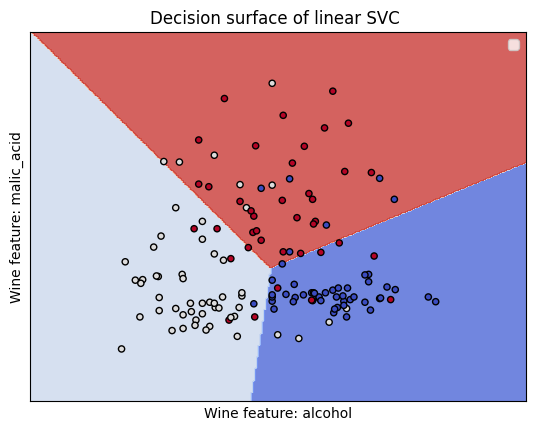

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

short_X = wine.data[:, :2]

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = SVC(kernel='linear')
short_X_train, short_X_test, short_y_train, short_y_test = train_test_split(short_X, wine.target, test_size=0.2)
clf_2feature = model.fit(short_X_train, short_y_train)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting
X0, X1 = short_X_train[:, 0], short_X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_2feature, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=short_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel(f'Wine feature: {wine.feature_names[1]}')
ax.set_xlabel(f'Wine feature: {wine.feature_names[0]}')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Visually, we can see that restricting to just the first two features does not give us the same 100% accuracy as we had with all 13 features. Let's check the accuracy rating. In fact, let's make it run 100 times and report the minimum/maximum accuracy as a quick check to make sure the accuracy rating is stable. 

In [43]:
accuracy_list = []

for test_number in range(100):
    model = SVC(kernel='linear')

    short_X = wine.data[:, :2]
    short_X_train, short_X_test, short_y_train, short_y_test = train_test_split(short_X, wine.target, test_size=0.2)
    clf_2feature = model.fit(short_X_train, short_y_train)

    # Make predictions
    predictions = clf_2feature.predict(short_X_test)

    # Evaluate accuracy
    accuracy = accuracy_score(short_y_test, predictions)
    #print("SVM Accuracy:", f'{int(round(accuracy, 2)*100)}%')

    accuracy_list.append(accuracy)

print("2-feature SVM Minimum Accuracy:", f'{int(round(min(accuracy_list), 2)*100)}%')
print("2-feature SVM Maximum Accuracy:", f'{int(round(max(accuracy_list), 2)*100)}%')
print("2-feature SVM Average Accuracy:", f'{int(round(sum(accuracy_list)/len(accuracy_list), 2)*100)}%')

2-feature SVM Minimum Accuracy: 57%
2-feature SVM Maximum Accuracy: 89%
2-feature SVM Average Accuracy: 76%


We can see why model validation is so important! If we only ran the 2-feature model once and got 94% accuracy, we might decide that is an acceptable accuracy for reducing from 13 features to 2. 